In [1]:
import numpy as np
import pandas as pd


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


Basic Questions :

1. Top 5 zipcodes of 911 calls :

In [12]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

2. Top 5 townships (twp) for 911 calls :

In [15]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

3. Unique titlle codes in title column :

In [14]:
df['title'].nunique()

110

Creating new features : Creating a new column called as reason 

In [17]:
def reason(x):
    a=x.split(':')
    return a[0]

In [19]:
df['Reason']= df['title'].apply(reason)

1. Count of most common reasons based on this new reason column :

In [21]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

2. Countplot based of the number of reasons (like EMS,traffic,fire) using seaborn :

<AxesSubplot:xlabel='Reason', ylabel='count'>

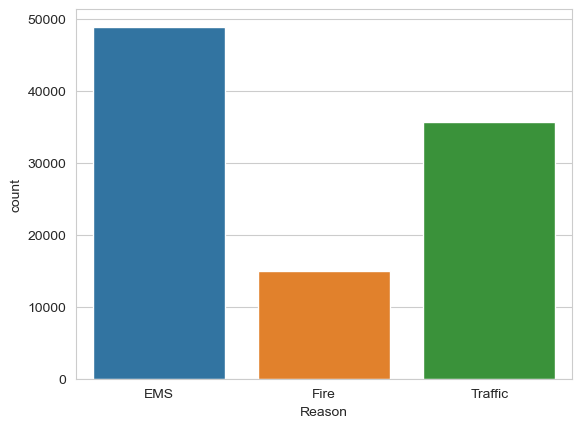

In [25]:
sns.countplot(x='Reason',data=df)

Timedate Questions :


Converting the string of timestamp into datetime objects and extracting hour,month and day of week from them :

In [50]:
dt=pd.to_datetime(df['timeStamp'])

In [51]:
def hour(x):
    return x.hour

In [54]:
df['Hour']=dt.apply(hour)

In [55]:
def month(x):
    return x.month

In [56]:
df['Month']=dt.apply(month)

In [58]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [60]:
df['Day of Week']=dt.apply(lambda x:x.dayofweek).map(dmap)

Countplot based on day of week column along with hue =reason :

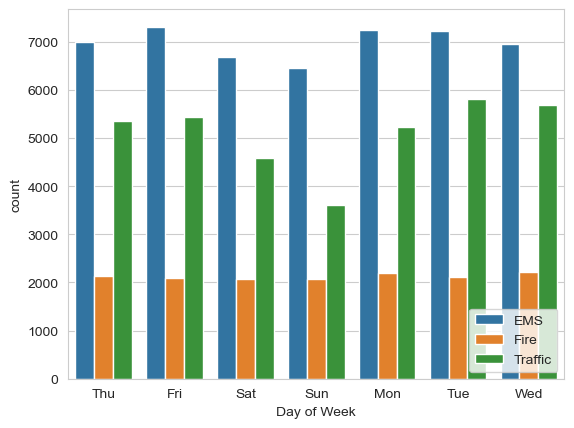

In [71]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(loc=4)

Countplot based on month column along with hue =reason :

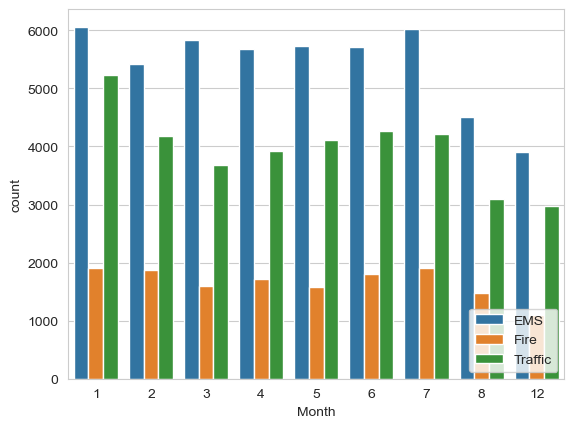

In [72]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(loc=4)

Group by called on the basis of month along with aggregate of count and then plotting a simple plot :

In [73]:
gr=df.groupby('Month').count()

In [141]:
g=gr.reset_index()

<AxesSubplot:xlabel='Month'>

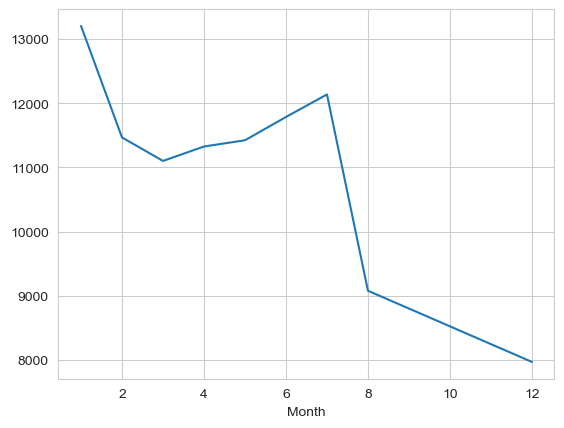

In [142]:
gr['lat'].plot()

Creating a linear fit on the number of calls per month using seaborn lmplot :

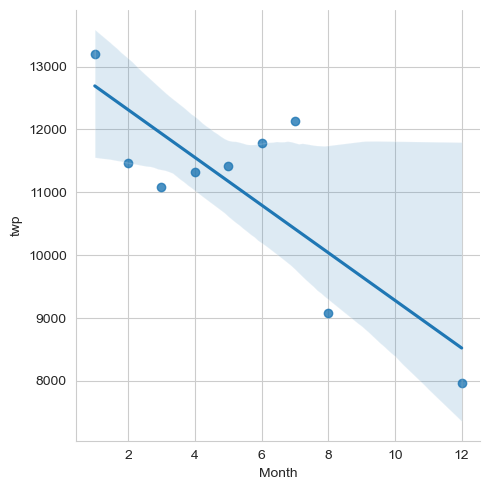

In [143]:
sns.lmplot(x='Month',y='twp',data=g)

Creating a date column using .date() method from the timestamp column and using .apply() and then group by using the date column to create a plot of counts of 911 calls :

In [147]:
d=df.groupby('Date').count()

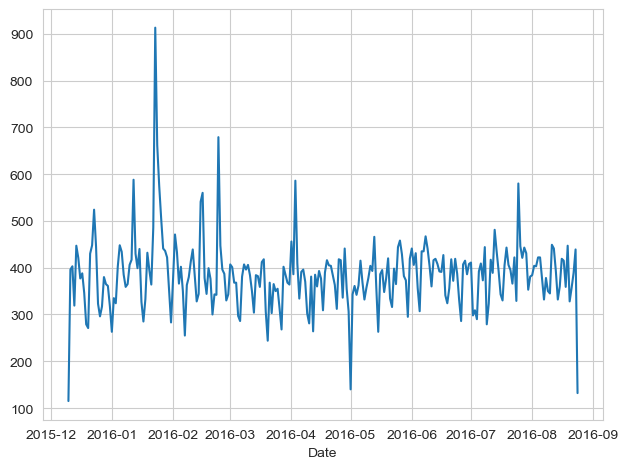

In [150]:
d['lat'].plot()
plt.tight_layout()

 Now segregatting the plot of count of 911 accroding to the reasons like ems,fire,traffic :

1. On traffic :

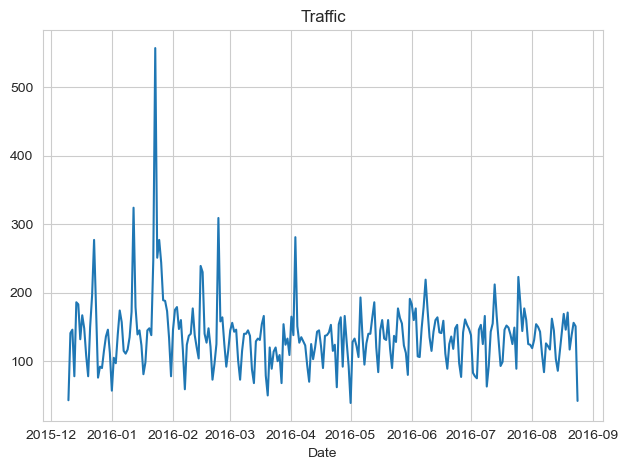

In [163]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

2. On Fire :

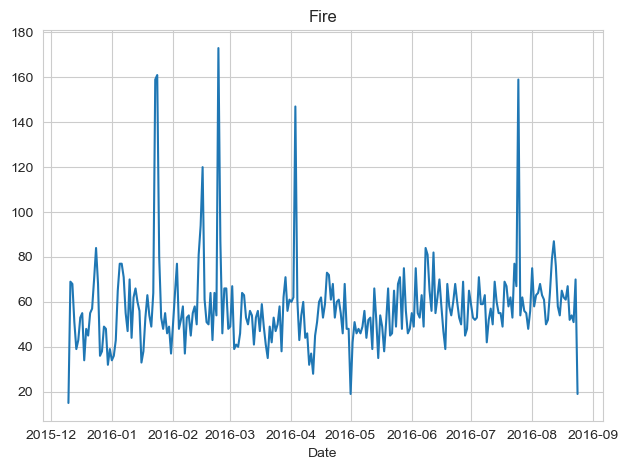

In [165]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

3. ON Ems :

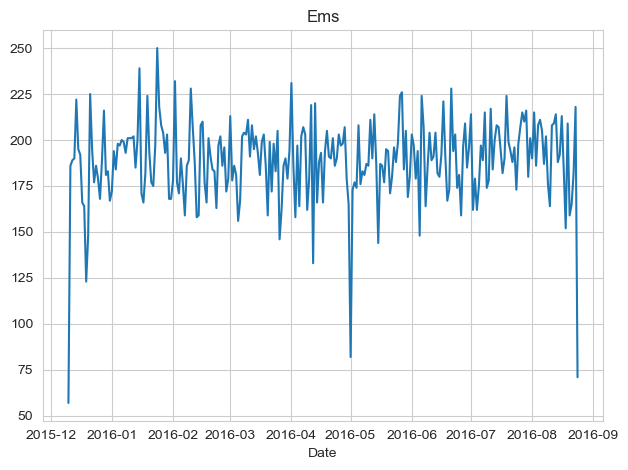

In [166]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('Ems')
plt.tight_layout()

Creating heatmap and clustermap with the dataframe by converting it in matrix form through pivot table where we have columns as hour :

In [197]:
hm=df.groupby(['Hour','Day of Week']).count().reset_index().pivot(index='Day of Week',columns='Hour',values='lat')




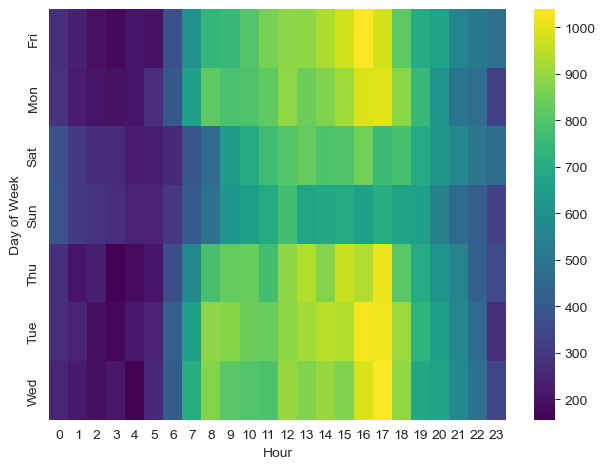

In [204]:
sns.heatmap(data=hm,cmap='viridis')
plt.tight_layout()

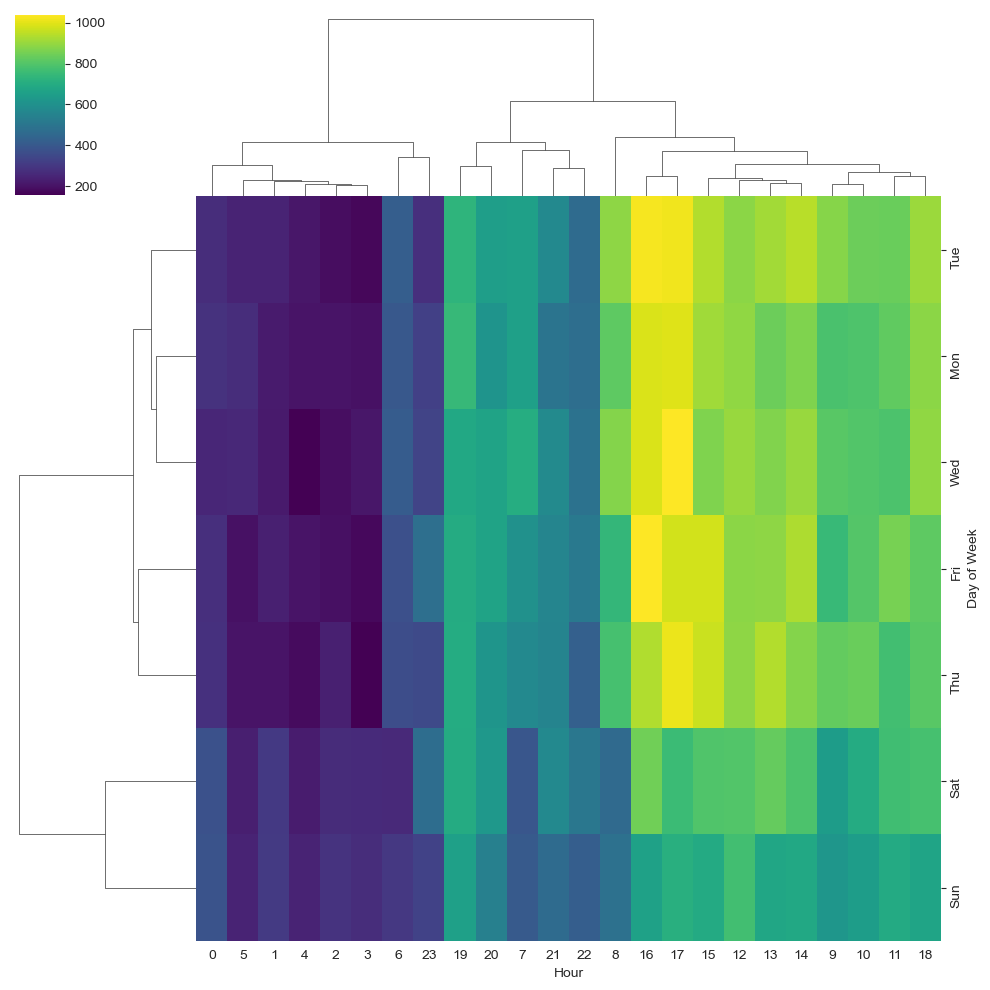

In [205]:
sns.clustermap(data=hm,cmap='viridis')


Creating heatmap and clustermap with the dataframe by converting it in matrix form through pivot table where we have columns as month, values represent the calls made to 911 :

In [200]:
mon=df.groupby(['Month','Day of Week']).count().reset_index().pivot(index='Day of Week',columns='Month',values='lat')

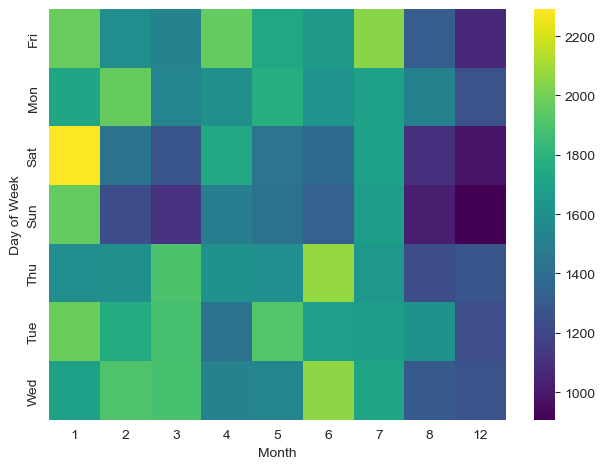

In [206]:
sns.heatmap(data=mon,cmap='viridis')
plt.tight_layout()

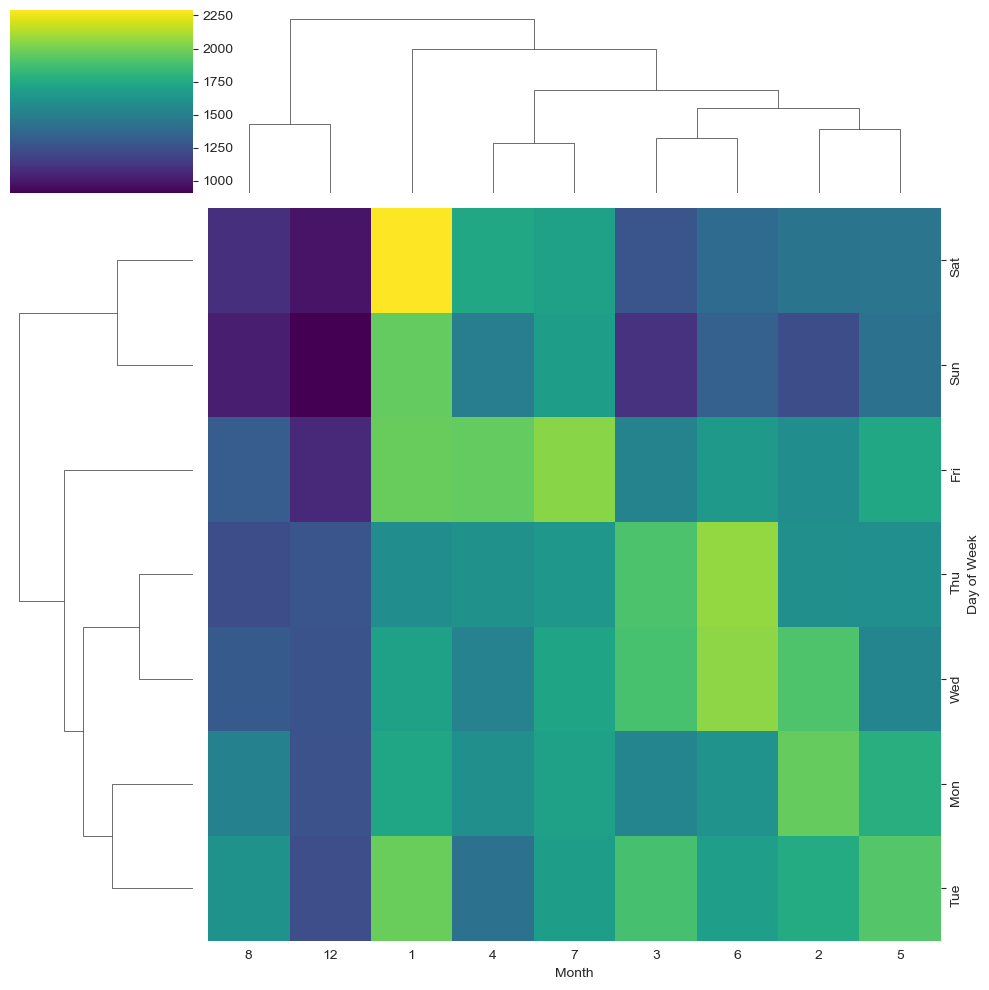

In [209]:
sns.clustermap(data=mon,cmap='viridis')
plt.tight_layout()